In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import skimage
import random
from tensorflow.keras.optimizers import Adam
#import Denoise_layer

In [3]:
#denoise  = Denoise_layer.Denoise(input_shape=(28,28),lam_val=0.2,trainable=False)

In [4]:
#Getting the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
train_num = 10000
test_num = 2000

In [7]:
x_train = x_train[:train_num]
y_train = y_train[:train_num]
x_test = x_test[:test_num]
y_test = y_test[:test_num]

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10000, 28, 28), (10000,), (2000, 28, 28), (2000,))

In [9]:
y_test.shape

(2000,)

In [10]:
#Finding total number of images in training and test set
print(len(x_train))
print(len(x_test))

10000
2000


In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
#Reshaping and Normalizing training and test images
x_train = x_train.reshape(train_num, 28, 28, 1)

x_test = x_test.reshape(test_num, 28, 28, 1)


In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10000, 28, 28, 1), (10000,), (2000, 28, 28, 1), (2000,))

In [14]:
epochs = 10
batchSize = 32
opt = Adam(learning_rate=0.001)

In [15]:
def VGG16model():
  model = Sequential()

  model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(128, 3, activation='relu', padding='same'))
  model.add(Conv2D(128, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 1)) # default stride is 2
  model.add(BatchNormalization())

  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 1)) # default stride is 2
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model

In [16]:
model_1 = VGG16model()

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [18]:
history_1 = model_1.fit(x_train, y_train, batch_size = batchSize, epochs=epochs)

Epoch 1/10
313/313 [==============================] - 21s 37ms/step - loss: 1.6966 - accuracy: 0.5613
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 0.3182 - accuracy: 0.9137
Epoch 3/10
313/313 [==============================] - 7s 23ms/step - loss: 0.3096 - accuracy: 0.9213
Epoch 4/10
313/313 [==============================] - 7s 24ms/step - loss: 0.2814 - accuracy: 0.9322
Epoch 5/10
313/313 [==============================] - 7s 24ms/step - loss: 0.2845 - accuracy: 0.9381
Epoch 6/10
313/313 [==============================] - 7s 24ms/step - loss: 0.3179 - accuracy: 0.9350
Epoch 7/10
313/313 [==============================] - 7s 24ms/step - loss: 0.1057 - accuracy: 0.9758
Epoch 8/10
313/313 [==============================] - 7s 24ms/step - loss: 0.1665 - accuracy: 0.9655
Epoch 9/10
313/313 [==============================] - 7s 24ms/step - loss: 0.1424 - accuracy: 0.9654
Epoch 10/10
313/313 [==============================] - 7s 24ms/step - loss: 0.0983 - accur

In [19]:
import matplotlib.pyplot as plt

In [20]:
def ShowPlots(hist):
  plt.figure(figsize=(16,6))
  plt.subplot(121)
  plt.plot(hist.history["accuracy"],'-ro',label="Accuracy")
  #plt.plot(hist.history["val_accuracy"],'-bo',label="Validation Accuracy")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.subplot(122)
  plt.plot(hist.history["loss"],'-ro',label="Loss")
  #plt.plot(hist.history["val_loss"],'-bo',label="Validation Loss")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  return plt.show()

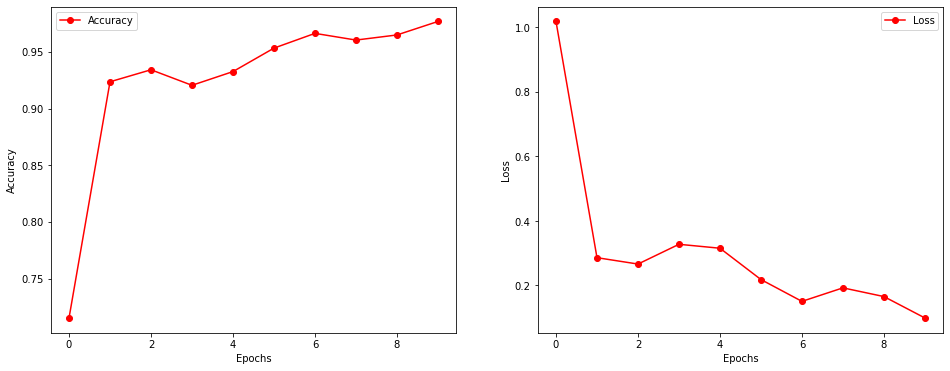

In [21]:
ShowPlots(history_1)

In [22]:
y_pred_1 = model_1.predict(x_test)
y_pred_1 = np.argmax(y_pred_1, axis=1)  

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.99      0.98      0.98       234
           2       0.95      1.00      0.97       219
           3       1.00      0.97      0.98       207
           4       0.91      0.99      0.95       217
           5       0.99      0.96      0.97       179
           6       0.97      0.98      0.97       178
           7       0.99      0.94      0.96       205
           8       0.98      0.97      0.98       192
           9       0.95      0.93      0.94       194

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

